In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
klik = pd.read_csv('Clicked Ads Dataset.csv',index_col=0)
klik.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [9]:
klik.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [10]:
klik['Timestamp'] = pd.to_datetime(klik['Timestamp'])
klik['Time'] = klik['Timestamp'].dt.time
klik['Date'] = klik['Timestamp'].dt.date
klik['years'] = klik['Timestamp'].dt.year
klik['month'] = klik['Timestamp'].dt.month
klik = klik.drop(columns='Timestamp',axis =1)
klik.set_index('Date', inplace=True)

In [11]:
klik['Area Income'] = klik['Area Income'].fillna(klik['Area Income'].median())
klik['Daily Internet Usage'] = klik['Daily Internet Usage'].fillna(klik['Daily Internet Usage'].median())
klik['Daily Time Spent on Site'] = klik['Daily Time Spent on Site'].fillna(klik['Daily Time Spent on Site'].median())
klik= klik.dropna()

In [12]:
klik.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2016-03-27 to 2016-06-03
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  997 non-null    float64
 1   Age                       997 non-null    int64  
 2   Area Income               997 non-null    float64
 3   Daily Internet Usage      997 non-null    float64
 4   Male                      997 non-null    object 
 5   Clicked on Ad             997 non-null    object 
 6   city                      997 non-null    object 
 7   province                  997 non-null    object 
 8   category                  997 non-null    object 
 9   Time                      997 non-null    object 
 10  years                     997 non-null    int64  
 11  month                     997 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 101.3+ KB


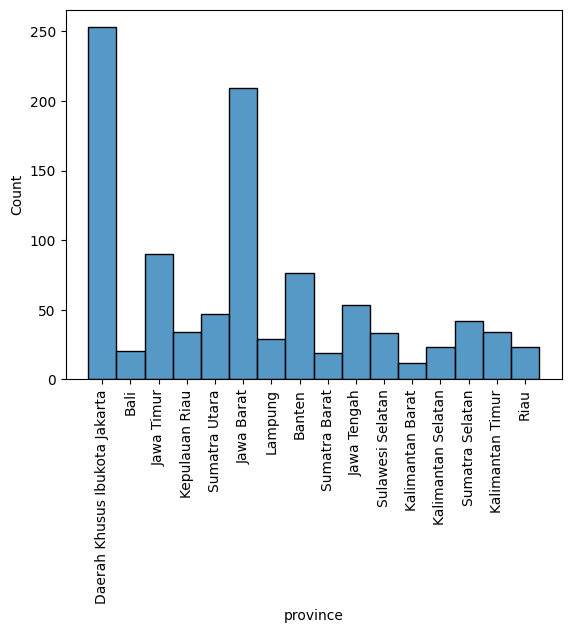

In [13]:
# melihat sebaran pengguna per provinsi
sns.histplot(x='province', data=klik)
plt.xticks(rotation=90)
plt.show()

In [14]:
# membagikan data menjadi 2 kategori
klik_ = klik[klik['Clicked on Ad']=='Yes']
klik_no = klik[klik['Clicked on Ad']=='No']
print(klik_.shape)
print(klik_no.shape)

(499, 12)
(498, 12)


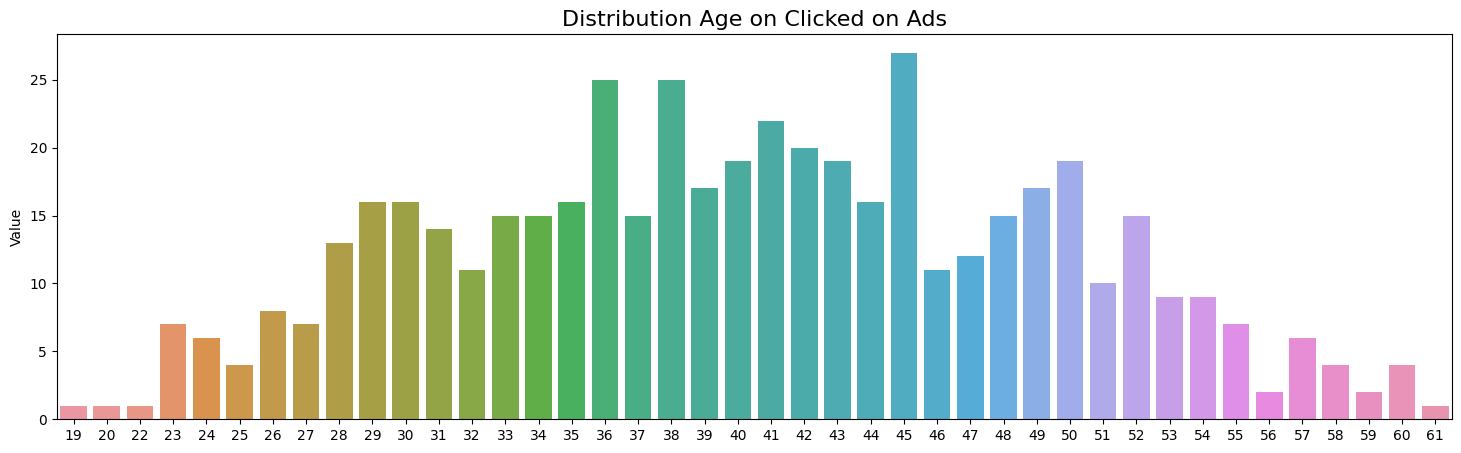

In [15]:
# menampilkan distribusi usia
plt.figure(figsize=[18,5])
Age1=klik_['Age'].value_counts().reset_index()
sns.barplot(x='index',y='Age', data=Age1, orient='v')
plt.title('Distribution Age on Clicked on Ads', fontsize=16)
plt.xlabel('')
plt.ylabel('Value')
plt.show()

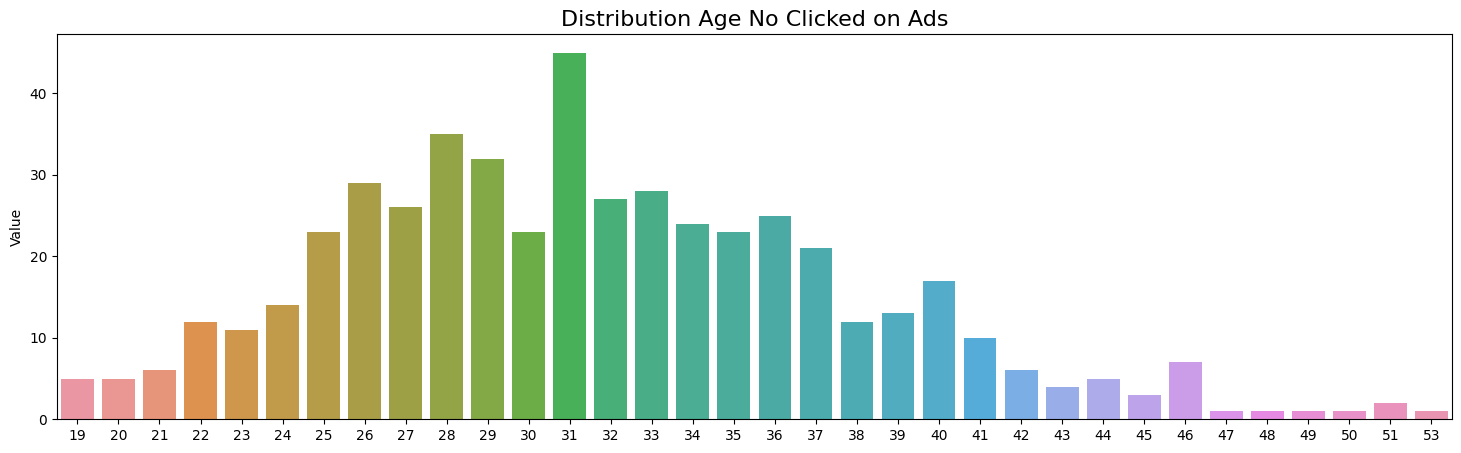

In [16]:
# menampilkan distribusi usia
plt.figure(figsize=[18,5])
Age2=klik_no['Age'].value_counts().reset_index()
sns.barplot(x='index',y='Age', data=Age2, orient='v')
plt.title('Distribution Age No Clicked on Ads', fontsize=16)
plt.xlabel('')
plt.ylabel('Value')
plt.show()

In [17]:
klik_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 2016-03-07 to 2016-06-03
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  499 non-null    float64
 1   Age                       499 non-null    int64  
 2   Area Income               499 non-null    float64
 3   Daily Internet Usage      499 non-null    float64
 4   Male                      499 non-null    object 
 5   Clicked on Ad             499 non-null    object 
 6   city                      499 non-null    object 
 7   province                  499 non-null    object 
 8   category                  499 non-null    object 
 9   Time                      499 non-null    object 
 10  years                     499 non-null    int64  
 11  month                     499 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 50.7+ KB


f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_15348\3331698447.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


C:\Users\USER\AppData\Local\Temp\ipykernel_15348\3331698447.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_15348\3331698447.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


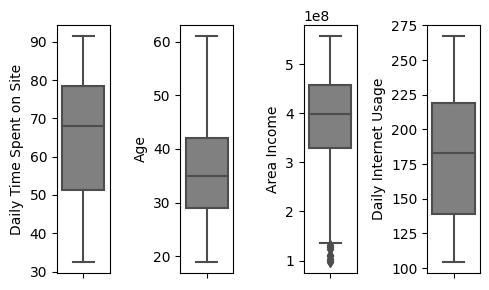

In [5]:
num_dtypes = ['int64','float64']
num_df = klik.select_dtypes(include=num_dtypes)
numerical = num_df.columns
plt.figure(figsize=(5,3))
for i in range (0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=klik[numerical[i]], color='grey')
    plt.tight_layout()

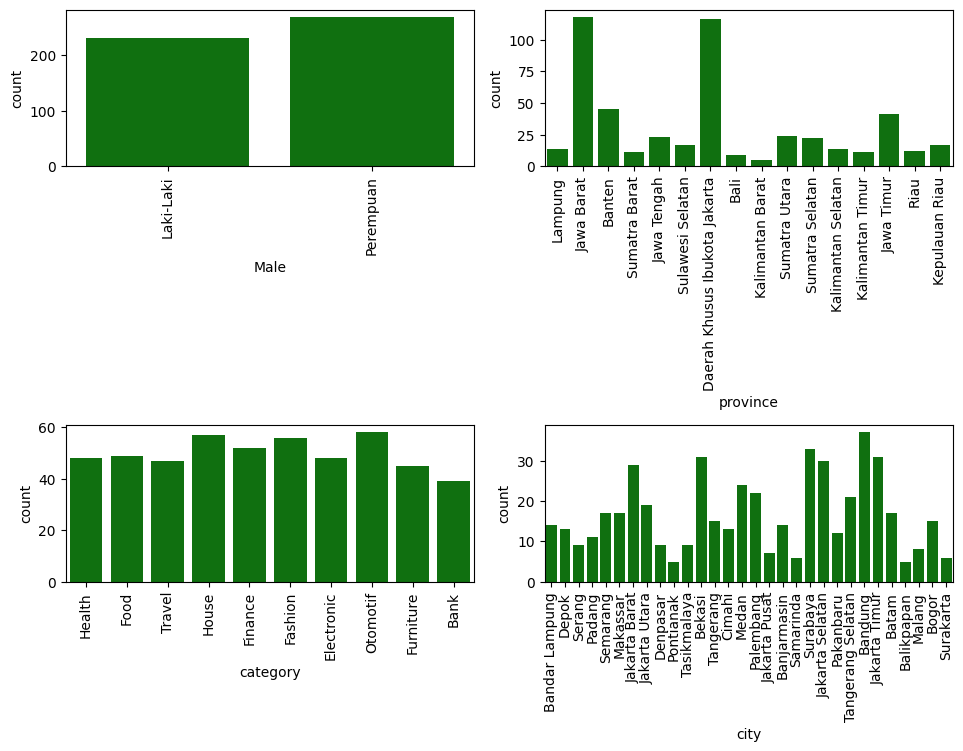

In [18]:
categoria =['Male','province','category','city']
plt.figure (figsize=(10,7))
for i in range (0, len(categoria)):
    plt.subplot(2,2 ,i+1)
    sns.countplot(x=klik_[categoria[i]],color='green')
    plt.tight_layout()
    plt.xticks(rotation=90)

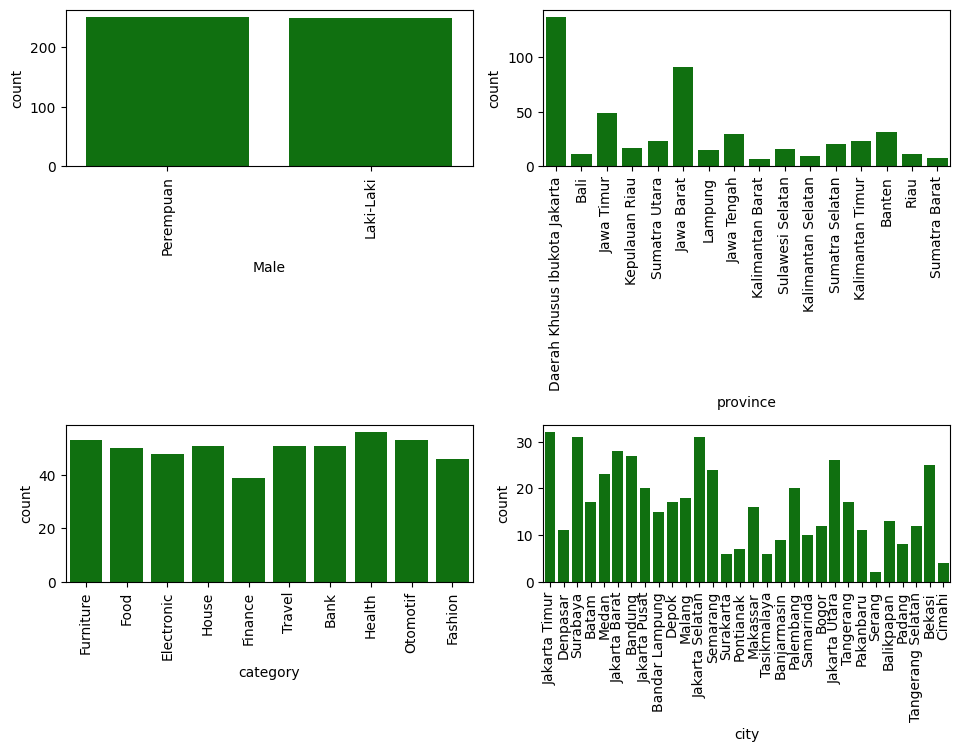

In [19]:
categoria =['Male','province','category','city']
plt.figure (figsize=(10,7))
for i in range (0, len(categoria)):
    plt.subplot(2,2 ,i+1)
    sns.countplot(x=klik_no[categoria[i]],color='green')
    plt.tight_layout()
    plt.xticks(rotation=90)

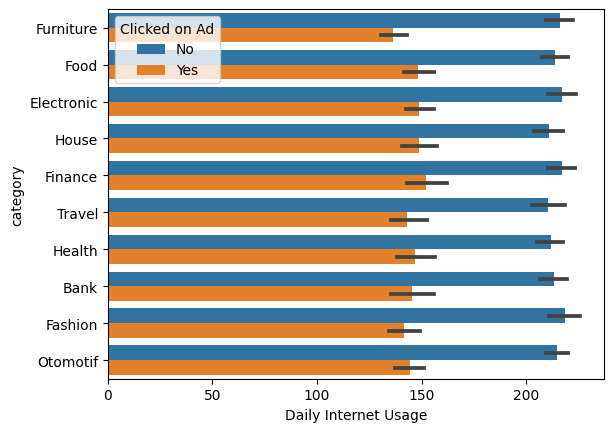

In [20]:
sns.barplot(x='Daily Internet Usage', y='category', hue='Clicked on Ad', data=klik )
plt.show()

<Axes: xlabel='Male', ylabel='Daily Internet Usage'>

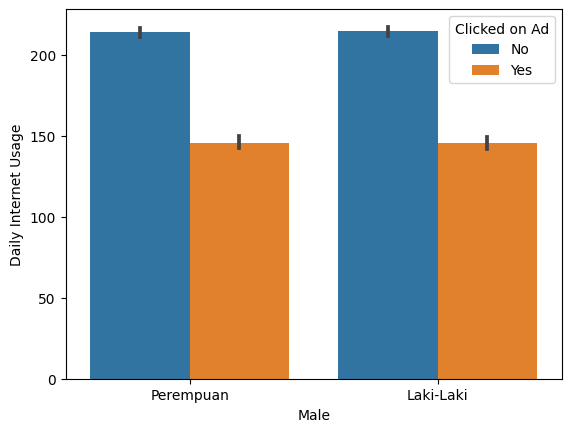

In [21]:
sns.barplot(y='Daily Internet Usage', x='Male', hue='Clicked on Ad', data=klik, orient='v' )

In [22]:
# melihat pengguna terhadap kolom numeric berdasarkan jenis kelamin
male_det = klik.groupby('Male').agg({'Area Income' :'mean',
                          'Daily Time Spent on Site': 'mean',
                          'Daily Internet Usage':'mean',
                          }).reset_index()
male_det # perbedaan pengguna antara wanita dan pria tidak jauh berbeda
# pengguna paling lama berselancar disitus adalah yang bergender  wanita
# namun penggunaan internet pemasukan paling besar adalah bergender pria

,Male,Area Income,Daily Time Spent on Site,Daily Internet Usage
0,Laki-Laki,3.855641e+08,64.620042,181.189207
1,Perempuan,3.846891e+08,65.244035,178.745560


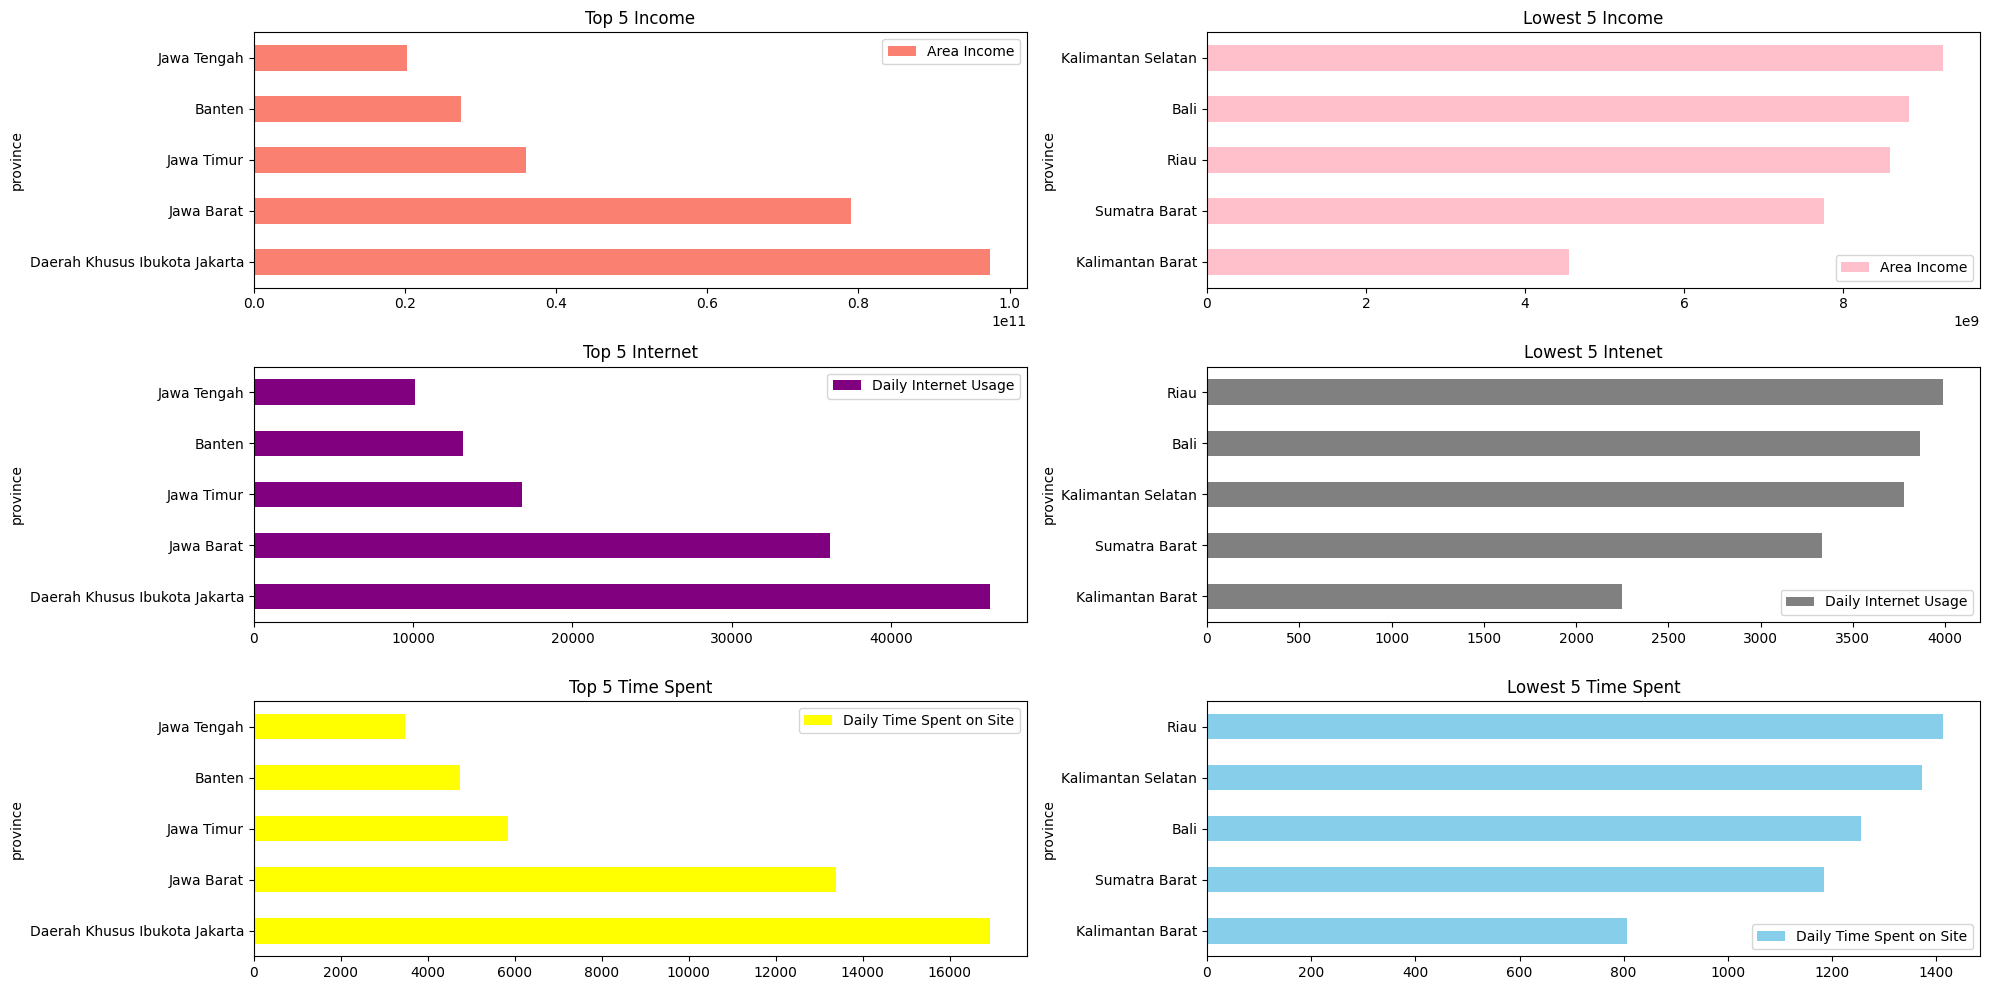

In [23]:
detail_prov = klik.groupby('province').agg({'city': 'count',
                              'Daily Time Spent on Site' :'sum',
                              'Area Income' : 'sum',
                              'Daily Internet Usage' :'sum'
                              }).reset_index()

# menampilkan 5 nilai tertinggi
top_5_income = detail_prov.nlargest(5, 'Area Income')
top_5_internet = detail_prov.nlargest(5, 'Daily Internet Usage')
top_5_time_spent = detail_prov.nlargest(5, 'Daily Time Spent on Site')

# menampilkan 5 provinsi dengan value terendah dari setiap kolom
top_5_lowest_income = detail_prov.nsmallest(5,'Area Income')
top_5_lowest_internet = detail_prov.nsmallest(5,'Daily Internet Usage')
top_5_lowest_time = detail_prov.nsmallest(5, 'Daily Time Spent on Site')


# membuat subplot untuk setiap kolom
fig,axes = plt.subplots(3,2 ,figsize=(20, 10))

top_5_income.plot(x='province', y='Area Income', kind= 'barh', ax= axes[0,0], color= 'salmon')
axes[0,0].set_title('Top 5 Income')


top_5_lowest_income.plot(x='province', y='Area Income', kind='barh', ax=axes[0,1], color = 'pink')
axes[0,1].set_title('Lowest 5 Income')

top_5_internet.plot(x='province', y='Daily Internet Usage', kind= 'barh', ax= axes[1,0], color= 'purple')
axes[1,0].set_title('Top 5 Internet')

top_5_lowest_internet.plot(x='province', y='Daily Internet Usage', kind='barh', ax=axes[1,1], color = 'grey')
axes[1,1].set_title('Lowest 5 Intenet')

top_5_time_spent.plot(x='province', y='Daily Time Spent on Site', kind= 'barh', ax= axes[2,0], color= 'yellow')
axes[2, 0].set_title('Top 5 Time Spent')

top_5_lowest_time.plot(x='province', y='Daily Time Spent on Site',kind='barh', ax=axes[2,1], color = 'skyblue')
axes[2,1].set_title('Lowest 5 Time Spent')

plt.tight_layout()
plt.show()

In [24]:
month_detail = klik.groupby(['month','province']).agg({'city' : 'count',
                                      'Area Income': 'sum',
                                      'Daily Time Spent on Site' : 'sum',
                                      'Daily Internet Usage': 'sum'}).reset_index()
month_detail

,month,province,city,Area Income,Daily Time Spent on Site,Daily Internet Usage
0,1,Bali,1,4.129728e+08,74.49,237.34
1,1,Banten,11,4.123143e+09,720.93,1941.33
2,1,Daerah Khusus Ibukota Jakarta,30,1.230872e+10,2052.68,5878.94
3,1,Jawa Barat,42,1.596985e+10,2663.35,7644.81
4,1,Jawa Tengah,9,3.213402e+09,595.59,1718.00
...,...,...,...,...,...,...
104,7,Riau,1,3.707775e+08,72.84,238.63
105,7,Sulawesi Selatan,2,6.900408e+08,103.36,419.38
106,7,Sumatra Barat,1,3.618408e+08,32.91,181.02
107,7,Sumatra Selatan,1,4.177821e+08,66.80,248.51


In [25]:
det_mon = month_detail.groupby('month').sum().reset_index()
det_mon

<ipython-input-25-984e9ff01ecb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  det_mon = month_detail.groupby('month').sum().reset_index()


,month,city,Area Income,Daily Time Spent on Site,Daily Internet Usage
0,1,147,5.789625e+10,9564.72,26988.65
1,2,160,6.182081e+10,10500.58,28127.28
2,3,155,5.967276e+10,10013.64,27522.08
3,4,146,5.621179e+10,9569.10,26387.24
4,5,147,5.688934e+10,9413.97,26353.15
5,6,141,5.322563e+10,9020.05,25094.68
6,7,101,3.823762e+10,6667.35,18906.75


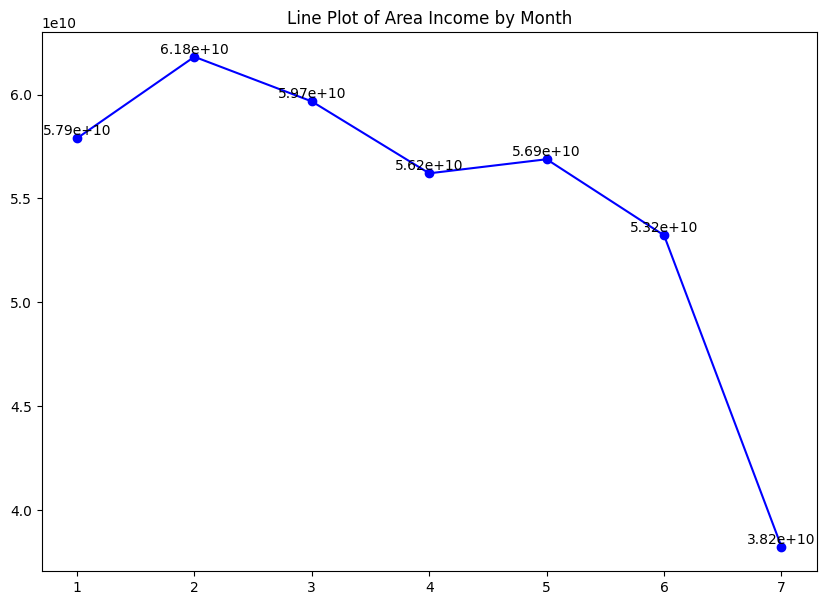

In [26]:
plt.figure (figsize=(10,7))
plt.plot(det_mon['month'], det_mon['Area Income'], marker='o', linestyle='-', color='b')
plt.title('Line Plot of Area Income by Month')
for i, income in enumerate(det_mon['Area Income']):
    plt.text(det_mon['month'][i], income, f'{income:.2e}', ha='center', va='bottom')
plt.show()
# income dari bulan ke bulan mengalami penurunan dimulai dari bulan ke 2 sampai 7
# penurunan yang sangat signifikan ddi bulan 6 ke 7

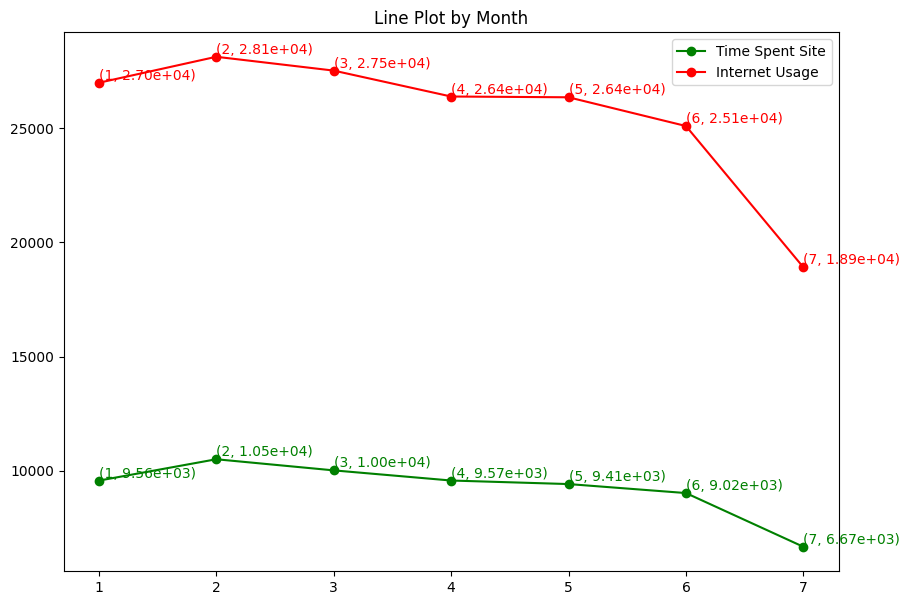

In [27]:
plt.figure (figsize=(10,7))
plt.plot(det_mon['month'], det_mon['Daily Time Spent on Site'], marker='o', linestyle='-', color='g', label= 'Time Spent Site')
plt.plot(det_mon['month'], det_mon['Daily Internet Usage'], marker='o', linestyle='-', color='r', label='Internet Usage')
plt.title('Line Plot by Month')
plt.legend()


# Menambahkan nilai di atas setiap titik
for i in range(len( det_mon['month'])):
    plt.text(det_mon['month'][i], det_mon['Daily Time Spent on Site'][i], f"({det_mon['month'][i]}, {det_mon['Daily Time Spent on Site'][i]:.2e})", ha='left', va='bottom', color='g')
    plt.text(det_mon['month'][i], det_mon['Daily Internet Usage'][i], f"({det_mon['month'][i]}, {det_mon['Daily Internet Usage'][i]:.2e})", ha='left', va='bottom', color='r')
plt.show()
# penggunaan internet mengalami penurunan namun sangat signifikan di bulan 6 ke 7
# begitupun dengan kunjungan situs juga mengalami hal yg sama

<ipython-input-28-6c87af99d645>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(klik.corr(), annot=True)


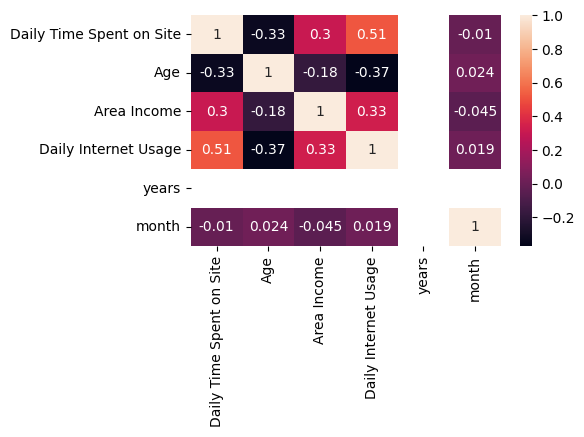

In [28]:
plt.figure(figsize=(5,3))
sns.heatmap(klik.corr(), annot=True)
plt.show()

<Figure size 500x300 with 0 Axes>

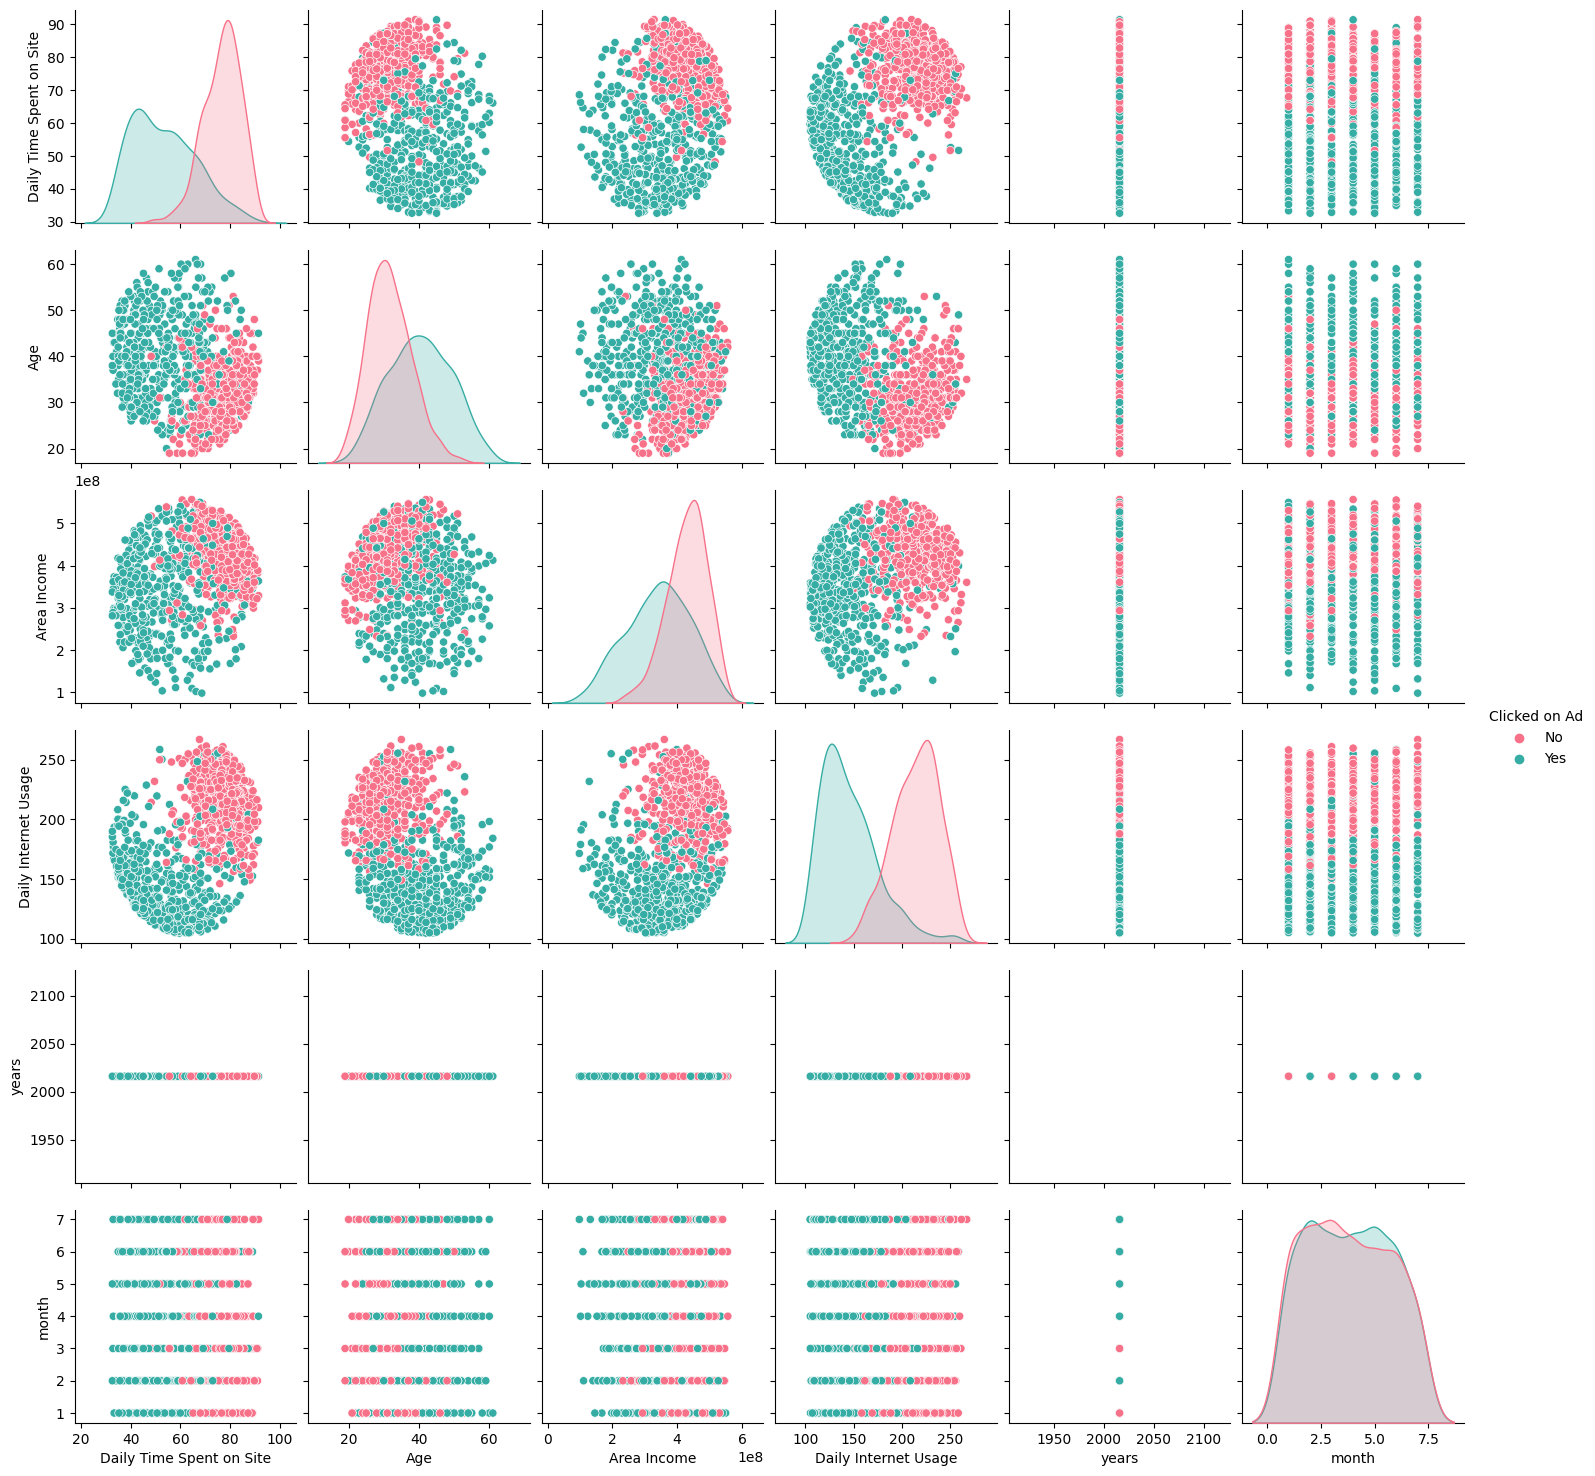

In [29]:
plt.figure(figsize=(5,3))
sns.pairplot(klik, hue='Clicked on Ad',palette='husl')
plt.show()

In [30]:
## melakukan feature encoding
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
klik['province'] = label.fit_transform(klik['province'])
klik['category'] = label.fit_transform(klik['category'])
klik['Male'] = label.fit_transform(klik['Male'])
klik['Clicked on Ad'] = label.fit_transform(klik['Clicked on Ad'])
klik['city'] = label.fit_transform(klik['city'])
klik

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Time,years,month
Date,,,,,,,,,,,,
2016-03-27,68.95,35,432837300.0,256.09,1,0,13,2,5,00:53:00,2016,3
2016-04-04,80.23,31,479092950.0,193.77,0,0,8,0,4,01:39:00,2016,4
2016-03-13,69.47,26,418501580.0,236.50,1,0,25,5,1,20:35:00,2016,3
2016-01-10,74.15,29,383643260.0,245.89,0,0,4,9,7,02:31:00,2016,1
2016-06-03,68.37,35,517229930.0,225.58,1,0,17,15,3,03:36:00,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-11,72.97,30,499691990.0,208.58,0,1,23,4,3,21:49:00,2016,2
2016-04-22,51.30,45,474475190.0,134.42,0,1,19,11,1,02:07:00,2016,4
2016-02-01,68.11,51,296910040.0,120.37,0,1,22,8,9,17:24:00,2016,2
